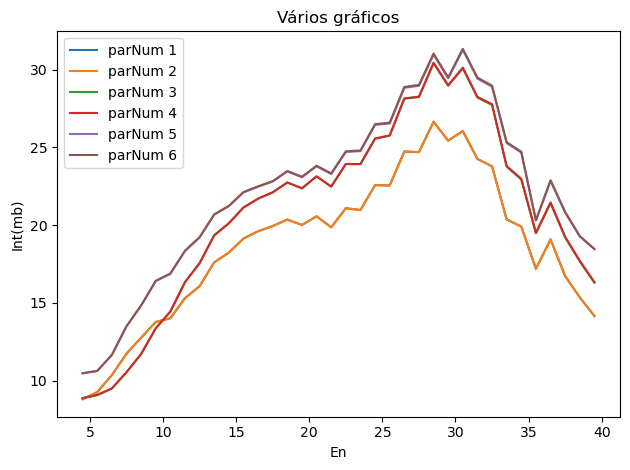

In [6]:
import re
import matplotlib.pyplot as plt

# Nome do arquivo
filename = "../integral_results_Legendre.txt"

# Vamos armazenar cada bloco de dados numa lista de listas (x,y)
blocks = []
current_block = []

with open(filename, "r") as f:
    for line in f:
        line = line.strip()
        # Se linha começa com #, é um header, então cria um novo bloco (se já tinha dados salva o bloco)
        if line.startswith("#"):
            if current_block:
                blocks.append(current_block)
                current_block = []
        elif line:  # linha com dados (não vazia)
            # cada linha tem 2 colunas separadas por tab ou espaço
            parts = re.split(r'\s+', line)
            if len(parts) == 2:
                x, y = map(float, parts)
                current_block.append((x, y))
    # adiciona o último bloco
    if current_block:
        blocks.append(current_block)

# Agora blocks é uma lista, onde cada elemento é uma lista de (x,y) tuples

# Vamos plotar
for i, block in enumerate(blocks, 1):
    x_vals = [p[0] for p in block]
    y_vals = [p[1] for p in block]
    plt.plot(x_vals, y_vals, label=f'parNum {i}')

plt.xlabel("En")
plt.ylabel("Int(mb)")
plt.title("Vários gráficos")
plt.legend()
plt.tight_layout()

# plt.show()  # Use para debug e ver se a imagem aparece

plt.savefig("plot_blocks.png", dpi=300)
